In [24]:
!jupyter nbconvert --to markdown 4_5_5_Exercises.ipynb

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook 4_5_5_Exercises.ipynb to markdown
[NbConvertApp] Support files will be in 4_5_5_Exercises_files/
[NbConvertApp] Writing 13137 bytes to 4_5_5_Exercises.md


# 4.7.7. Exercises

## 1. What could happen when we change the behavior of a search engine? What might the users do? What about the advertisers?

When the behavior of a search engine changes, several outcomes can occur, impacting both users and advertisers:

1. **Users' Reactions:**
   - Improved Search Experience: If the changes result in more accurate and relevant search results, users might have a better experience and find the information they're looking for more easily.
   - Frustration and Discontent: On the other hand, if the changes lead to less relevant results, users might become frustrated and dissatisfied with the search engine's performance.
   - Change in User Habits: Users might change their search behaviors, such as using different search engines or altering their search queries to adapt to the new behavior.

2. **Advertisers' Reactions:**
   - Changes in Ad Performance: Altering the behavior of the search engine could affect the performance of advertisements. Advertisers might see variations in click-through rates, conversion rates, and overall campaign success.
   - Adjustment of Advertising Strategies: Advertisers might need to modify their advertising strategies, keywords, and targeting parameters to align with the new search engine behavior.
   - Financial Impact: If the changes lead to decreased ad performance, advertisers might experience reduced return on investment (ROI) and might reconsider their advertising budgets on that platform.

3. **Algorithmic Impact:**
   - Changes in Ranking: Search engine behavior often revolves around algorithms that determine how content is ranked and displayed. Algorithmic changes could lead to shifting rankings, affecting the visibility of websites and content.
   - SEO Practices: Search engine optimization (SEO) strategies might need to be adjusted to match the new algorithms, potentially affecting how websites are optimized for better search engine visibility.

4. **Search Engine Market Share:**
   - Changes in User Base: Search engine behavior changes could influence user preferences, leading to shifts in market share among search engines. Users might migrate to other search engines if they prefer their new behaviors.

5. **Ethical and Legal Considerations:**
   - Privacy Concerns: Changes in behavior could impact user privacy and data usage, leading to ethical and legal concerns regarding user data collection and tracking.
   - Regulatory Compliance: Changes in behavior might need to comply with data protection and privacy regulations in different regions.

Overall, any changes to a search engine's behavior can have far-reaching effects on user satisfaction, user habits, advertiser performance, and even the competitive landscape. Careful consideration and testing are essential before implementing significant changes to ensure a positive impact on both users and advertisers.

## 2. Implement a covariate shift detector. Hint: build a classifier.

In [1]:
# torch.utils.data.DataLoader??

In [3]:
x,y = next(iter(data.get_dataloader(True)))
y.shape,y.sum()

(torch.Size([256]), tensor(129))

In [3]:
y_hat=model.net(x)
y_hat.shape

torch.Size([256, 2])

In [6]:
y_hat[:,1].shape

torch.Size([256])

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


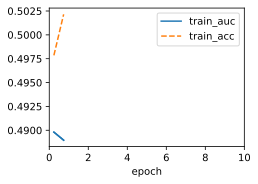

In [1]:
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.nn import functional as F
import sys
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l


class CovarFashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)
        num_rows_to_select = val.data.shape[0]//2
        # 从数组中随机选择行
        random_rows_indices = torch.randperm(train.data.size(0))
        self.train_X = torch.cat(
            (train.data[random_rows_indices[:num_rows_to_select]],
             val.data[:num_rows_to_select]), dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.train_y = torch.cat((torch.ones(num_rows_to_select),
                             torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.val_X = torch.cat((train.data[
            random_rows_indices[num_rows_to_select:2*num_rows_to_select]],
            val.data[num_rows_to_select:2*num_rows_to_select]),
                          dim=0).type(torch.float32)#.unsqueeze(dim=1)
        self.val_y = torch.cat((torch.ones(num_rows_to_select),
                           torch.zeros(num_rows_to_select)), dim=0).type(torch.int64)
        self.train = torch.utils.data.TensorDataset(self.train_X, self.train_y)
        self.val = torch.utils.data.TensorDataset(self.val_X, self.val_y)
        
    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train
                                           , num_workers=self.num_workers)
        
data = CovarFashionMNIST(batch_size=256)
model = d2l.SoftmaxRegression(num_outputs=2, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

## 3. Implement a covariate shift corrector.

## 4. Besides distribution shift, what else could affect how the empirical risk approximates the risk?